In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/twitter_training.csv',header=None)
data

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
data.columns=['ID','LOCATION','TARGET','TEXT']
data

,ID,LOCATION,TARGET,TEXT
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        74682 non-null  int64 
 1   LOCATION  74682 non-null  object
 2   TARGET    74682 non-null  object
 3   TEXT      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
data.isna().sum()

ID            0
LOCATION      0
TARGET        0
TEXT        686
dtype: int64

In [ ]:
data['TARGET'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: TARGET, dtype: int64

In [ ]:
data['TARGET'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<Axes: xlabel='TARGET', ylabel='count'>

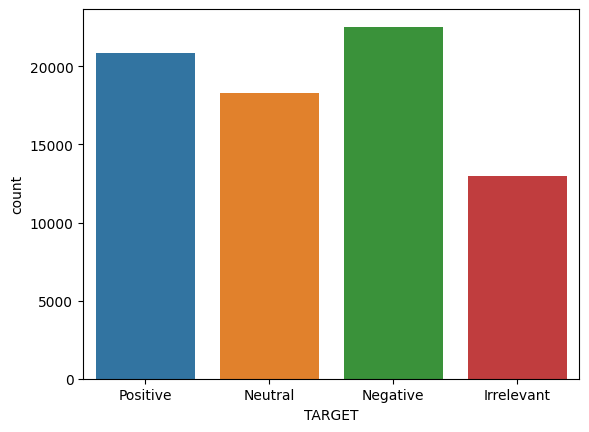

In [ ]:
import seaborn as sns
sns.countplot(x='TARGET',data=data)

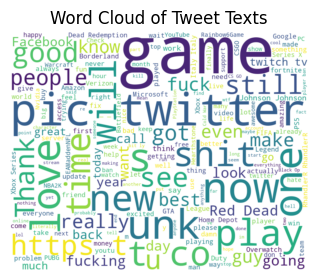

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(data['TEXT'].dropna()))
# Plot for word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud of Tweet Texts')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
data.drop(data.index[data['TARGET']=='Irrelevant'],axis=0,inplace=True)
data

,ID,LOCATION,TARGET,TEXT
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
data.drop(['ID','LOCATION'],axis=1,inplace=True)
data

,TARGET,TEXT
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [ ]:
data['TARGET']=data['TARGET'].map({'Positive':1,'Negative':-1,'Neutral':0})
data

,TARGET,TEXT
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [ ]:
tweets=data.TEXT
tweets

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: TEXT, Length: 61692, dtype: object

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-14-243a49c37bfd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: TEXT, Length: 61692, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
stemmer = SnowballStemmer('english')
tokenizer = TweetTokenizer()
tweets = tweets.fillna('').astype(str)
tweets = tweets.apply(lambda x: ' '.join([stemmer.stem(word.lower()) for word in tokenizer.tokenize(x)]))
print(tweets)


0           im get on borderland and i will murder you all
1          i am come to the border and i will kill you all
2             im get on borderland and i will kill you all
3          im come on borderland and i will murder you all
4        im get on borderland 2 and i will murder you m...
                               ...                        
74677    just realiz that the window partit of my mac i...
74678    just realiz that my mac window partit is 6 yea...
74679    just realiz the window partit of my mac is now...
74680    just realiz between the window partit of my ma...
74681    just like the window partit of my mac is like ...
Name: TEXT, Length: 61692, dtype: object


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                               im get borderland 2 murder
                               ...                        
74677    realiz window partit mac like 6 year behind nv...
74678    realiz mac window partit 6 year behind nvidia ...
74679    realiz window partit mac 6 year behind nvidia ...
74680    realiz window partit mac like 6 year behind nv...
74681    like window partit mac like 6 year behind driv...
Name: TEXT, Length: 61692, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(tweets)
print(train_data_vec)

  (0, 12683)	0.6730103007248203
  (0, 4007)	0.42392218796406755
  (0, 8437)	0.32424437145094054
  (0, 9864)	0.5120670866716872
  (1, 10846)	0.4942247167249265
  (1, 4005)	0.7462672532242293
  (1, 5138)	0.4459003432868494
  (2, 10846)	0.5368353840071853
  (2, 4007)	0.4835608885775419
  (2, 8437)	0.3698600847671917
  (2, 9864)	0.5841062875983802
  (3, 5138)	0.40949932608130163
  (3, 12683)	0.6490608926334446
  (3, 4007)	0.40883670492226853
  (3, 9864)	0.493844923332353
  (4, 12683)	0.6730103007248203
  (4, 4007)	0.42392218796406755
  (4, 8437)	0.32424437145094054
  (4, 9864)	0.5120670866716872
  (5, 12683)	0.6730103007248203
  (5, 4007)	0.42392218796406755
  (5, 8437)	0.32424437145094054
  (5, 9864)	0.5120670866716872
  (6, 1628)	0.2956243164240888
  (6, 12415)	0.2956243164240888
  :	:
  (61689, 15162)	0.3220233159223399
  (61689, 20415)	0.20408119305150327
  (61690, 13875)	0.41830700432991136
  (61690, 13261)	0.19568691019259787
  (61690, 6577)	0.2840759041157257
  (61690, 19974)	0.2669

In [ ]:
train_data_vec.shape

(61692, 20705)

In [ ]:
y=data['TARGET'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_vec,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
svm_model=svm.SVC()
nb_model=MultinomialNB()
rf_model=RandomForestClassifier()
ab_model=AdaBoostClassifier()
lstmodel=[svm_model,nb_model,rf_model,ab_model]

SVC()
**************************************************
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

**************************************************
MultinomialNB()
**************************************************
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

**************************************************
RandomForestClassifier()
**************************************************
              precision    recall  f1-score 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


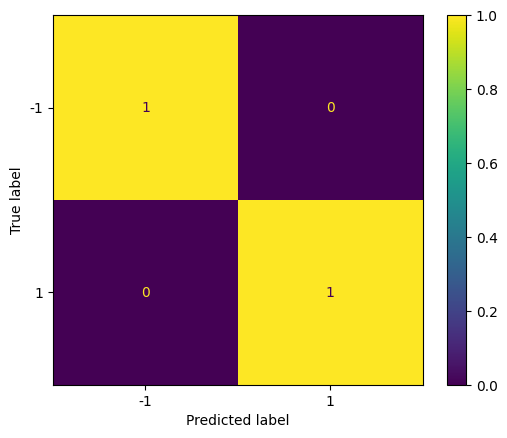

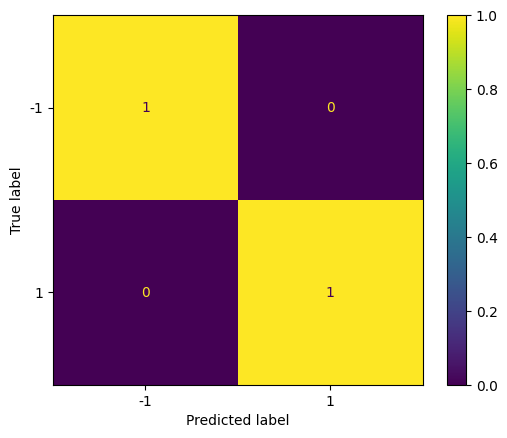

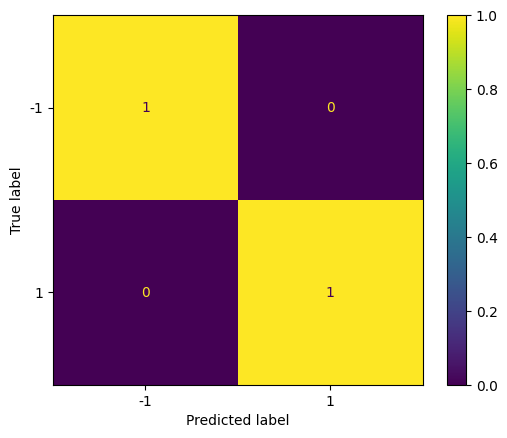

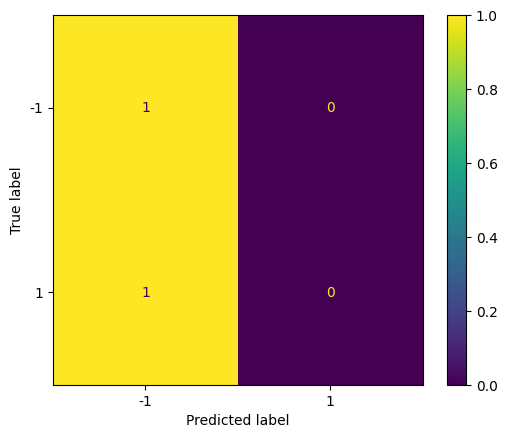

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
for i in lstmodel:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('**************************************************')
  print(classification_report(y_test,y_pred))
  print('**************************************************')
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))